In [11]:
from sklearn import svm, datasets 

clf = svm.SVC()
iris = datasets.load_iris()
X,y = iris.data, iris.target 
clf.fit(X,y)

SVC()

In [ ]:
from sklearn.externals import joblib 
joblib.dump(clg, 'filename.pkl')

In [21]:
import numpy as np 
from sklearn import random_projection

rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype='float32')
X.dtype 

transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
print(transformer)
# print(X_new)

GaussianRandomProjection()


In [26]:
from sklearn import datasets 
from sklearn.svm import SVC 

iris = datasets.load_iris()
clf = SVC()

clf.fit(iris.data, iris.target)
print(list(clf.predict(iris.data[:3])))
clf.fit(iris.data, iris.target_names[iris.target])
print(list(clf.predict(iris.data[:3])))

[0, 0, 0]
['setosa', 'setosa', 'setosa']


In [2]:
import numpy as np 
from sklearn.svm import SVC 

rng = np.random.RandomState(0)
X = rng.rand(100, 10)
y = rng.binomial(1, 0.5, 100)

X_test = rng.rand(5,10)

clf  = SVC()
clf.set_params(kernel='linear').fit(X,y)

clf.predict(X_test)
clf.set_params(kernel='rbf').fit(X,y)

clf.predict(X_test)

array([0, 0, 0, 1, 0])

In [34]:
rng.binomial?

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd', metrics=['accuracy'])
model.fit(X,y)
model.predict(X_test)

In [4]:
from sklearn.svm import SVC 
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.preprocessing import LabelBinarizer 

X = [[1,2], [2,4], [4,5], [3,2], [3,1]]
y = [0,0, 1,1,2]

classif = OneVsRestClassifier(estimator=SVC(random_state=0))
classif.fit(X,y).predict(X)

# Fit a 2d array of binary label indicators 
y = LabelBinarizer().fit_transform(y)
classif.fit(X,y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

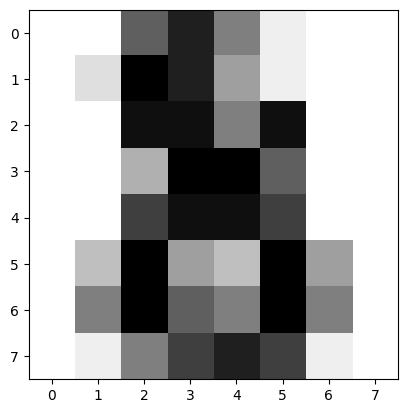

In [6]:
from sklearn import datasets 
import matplotlib.pyplot as plt 

iris  = datasets.load_iris()
data = iris.data 
digits = datasets.load_digits()

plt.imshow(digits.images[-1], cmap=plt.cm.gray_r);



In [8]:
# Diabetes dataset

diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [11]:
from sklearn import linear_model 
import numpy as np 

regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr.coef_)
# The MSE 
np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)

[ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]


2004.5186863342092

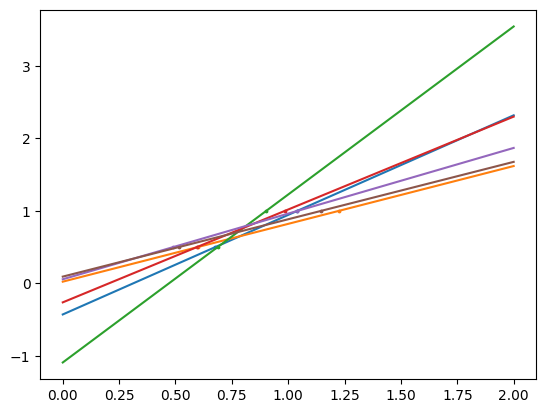

In [12]:
X = np.c_[.5, 1].T 
y = [.5, 1]
test = np.c_[0,2].T

np.random.seed(0)
for _ in range(6):
    this_X = .1*np.random.normal(size=(2,1)) + X 
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

In [13]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(diabetes_X_train, diabetes_y_train)

/home/clarion/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0)

In [10]:
from sklearn import datasets, svm

digits = datasets.load_digits()
X_digits = digits.data 
y_digits = digits.target 
svc = svm.SVC(C=1, kernel='linear')



In [12]:
import numpy as np 
X_folds = np.array_split(X_digits,3)
y_folds = np.array_split(y_digits,3)
scores = list()
for k in range(3):
    # we use 'list' in order to 'pop' later on 
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train  = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
    
print(scores)

[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]
